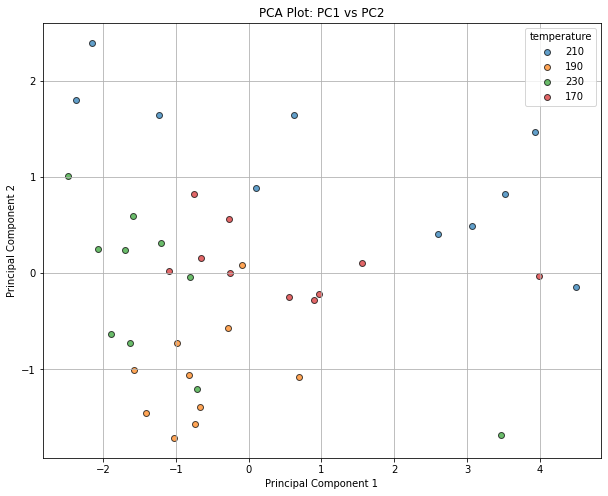

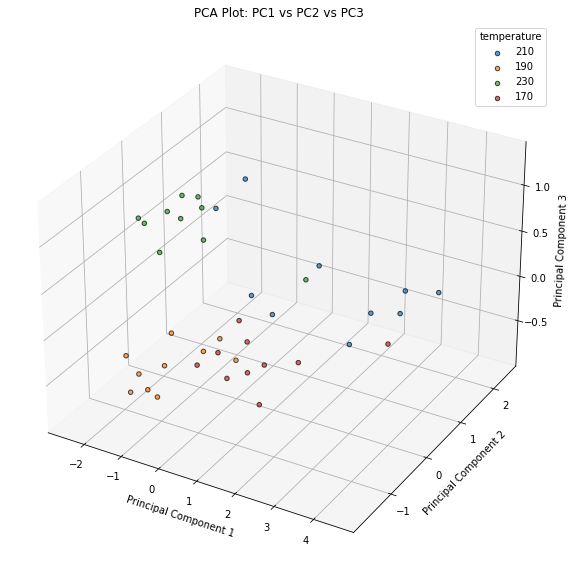

In [1]:
from AFM_ANALYSIS.analysis.pca_analysis import perform_pca_and_plot
import pandas as pd
import numpy as np
from AFM_ANALYSIS import texture_features

extractor = texture_features.TextureFeatureExtractor()


base_folder = "/Users/mateotrc/Documents/AFM PhD/Codes/AFM_ANALYSIS/data"

# Define GLCM and LBP parameters
glcm_params = {
    'distances': [1,2,3,4],
    'angles': [0, np.pi / 4, np.pi / 2, np.pi * 3 / 4],
    'props': ['contrast', 'homogeneity', 'energy','dissimilarity','correlation']
}
lbp_params = {
    'radius': 1,
    'n_points': 8,
    'method': 'uniform'
}

# Replace with your base folder path
df = extractor.extract_features_from_folders(base_folder,glcm_params,lbp_params)

# Define the columns to use for PCA
features = [
    'glcm_mean_contrast', 
    'glcm_mean_homogeneity', 
    'glcm_mean_energy', 
    'glcm_mean_dissimilarity', 
    'glcm_mean_correlation'
]

# Perform PCA and plot
pca_results = perform_pca_and_plot(df[df['temperature'].isin(['230','170','190','210'])], features, temp_col='temperature', n_components=3)
# pca_results = perform_pca_and_plot(df[df['temperature'].isin(df['temperature'])], features, temp_col='temperature', n_components=3)


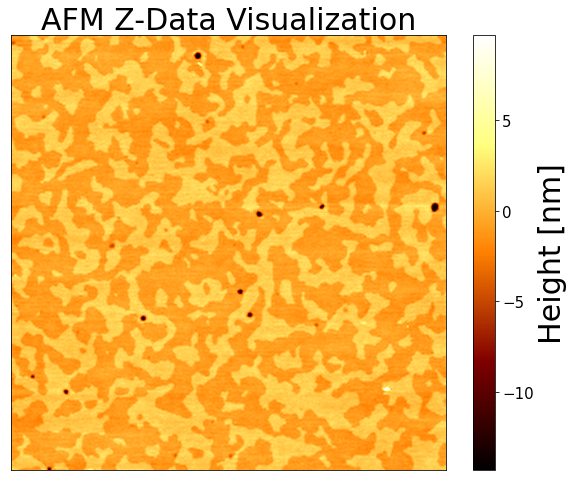

In [3]:
from AFM_ANALYSIS import texture_features

# Instantiate the TextureFeatureExtractor
extractor = texture_features.TextureFeatureExtractor()
# Path to AFM TXT file
file_path = '../data/170/241125_Z Height_Forward_014.txt'

# Load AFM data and resize to 256x256
z_matrix = extractor.load_afm_txt(file_path, output_size=(256, 256))

# Visualize the resized Z-data
extractor.visualize_z_data(z_matrix, figsize=(10, 8))

In [6]:
import AFM_ANALYSIS

print(dir(AFM_ANALYSIS))

print(dir(AFM_ANALYSIS.analysis))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'texture_features']


AttributeError: module 'AFM_ANALYSIS' has no attribute 'analysis'

In [ ]:
import numpy as np
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops

from skimage.feature import greycomatrix as glcm_fun

extractor.extract_glcm_features(z_matrix,distances=[1, 2],
    angles= [0, np.pi / 4],
    props=['contrast', 'homogeneity', 'energy'])
# distances=[1, 2]
# angles= [0, np.pi / 4]
# props=['contrast', 'homogeneity', 'energy']

# glcm = glcm_fun(z_matrix, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)


In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Define GLCM and LBP parameters
glcm_params = {
    'distances': [1, 2],
    'angles': [0, np.pi / 4],
    'props': ['contrast', 'homogeneity', 'energy']
}
lbp_params = {
    'radius': 1,
    'n_points': 8,
    'method': 'uniform'
}

extractor.process_afm_file(file_path, glcm_params, lbp_params)

In [5]:
import numpy as np

base_folder = "/Users/mateotrc/Documents/AFM PhD/Codes/AFM_ANALYSIS/data"

# Define GLCM and LBP parameters
glcm_params = {
    'distances': [1,2,3,4],
    'angles': [0, np.pi / 4, np.pi / 2, np.pi * 3 / 4],
    'props': ['contrast', 'homogeneity', 'energy','dissimilarity','correlation']
}
lbp_params = {
    'radius': 1,
    'n_points': 8,
    'method': 'uniform'
}

# Replace with your base folder path
df = extractor.extract_features_from_folders(base_folder,glcm_params,lbp_params)

# Save to CSV for analysis
# df.to_csv("texture_features.csv", index=False)
df

,glcm_dist_1_angle_0.0_contrast,glcm_dist_1_angle_0.0_homogeneity,glcm_dist_1_angle_0.0_energy,glcm_dist_1_angle_0.0_dissimilarity,glcm_dist_1_angle_0.0_correlation,glcm_dist_1_angle_45.0_contrast,glcm_dist_1_angle_45.0_homogeneity,glcm_dist_1_angle_45.0_energy,glcm_dist_1_angle_45.0_dissimilarity,glcm_dist_1_angle_45.0_correlation,...,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,temperature,file_name
0,48.754274,0.296407,0.056889,4.229825,0.856235,94.062730,0.204715,0.046931,6.107236,0.722723,...,0.056107,0.104294,0.137238,0.136368,0.087402,0.084717,0.088654,0.157242,210,241118_Z Height_Forward_007.txt
1,19.375475,0.426362,0.108888,2.500536,0.853542,40.944437,0.317491,0.090839,3.682922,0.691000,...,0.045212,0.104462,0.121109,0.137436,0.090561,0.093979,0.107971,0.169586,210,241118_Z Height_Forward_013.txt
2,70.248070,0.286144,0.058460,4.761060,0.852032,127.444675,0.204182,0.048788,6.717601,0.731700,...,0.061203,0.109711,0.138306,0.133728,0.086884,0.084290,0.089066,0.152588,210,241118_Z Height_Forward_010.txt
3,13.519485,0.473266,0.110945,2.118352,0.875113,25.031772,0.373001,0.093213,2.988897,0.768641,...,0.033112,0.115616,0.135986,0.160217,0.094971,0.088242,0.115631,0.151581,210,241118_Z Height_Forward_004.txt
4,20.653814,0.400621,0.088541,2.717601,0.862043,39.619469,0.299936,0.074186,3.855440,0.735825,...,0.046814,0.103104,0.132996,0.142532,0.092209,0.087860,0.103958,0.160919,210,241118_Z Height_Forward_005.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,25.475735,0.369367,0.067067,3.023284,0.885148,50.401676,0.241811,0.052549,4.694979,0.772954,...,0.049454,0.101318,0.135803,0.123032,0.070694,0.095596,0.113922,0.164536,170,241125_Z Height_Forward_019.txt
66,28.931510,0.338140,0.057624,3.342142,0.882288,58.693749,0.230173,0.046352,5.140869,0.761320,...,0.051880,0.107315,0.151855,0.132568,0.071503,0.087845,0.105087,0.152481,170,241125_Z Height_Forward_021.txt
67,20.912607,0.378546,0.065401,2.796492,0.884699,43.874279,0.256130,0.051882,4.363353,0.758285,...,0.047440,0.106522,0.153122,0.138275,0.073792,0.087311,0.108597,0.152344,170,241125_Z Height_Forward_020.txt
68,33.883088,0.322022,0.052254,3.589737,0.887117,69.278462,0.204805,0.040812,5.630327,0.769280,...,0.049362,0.105820,0.147598,0.125427,0.070938,0.091965,0.104935,0.157837,170,241125_Z Height_Forward_022.txt


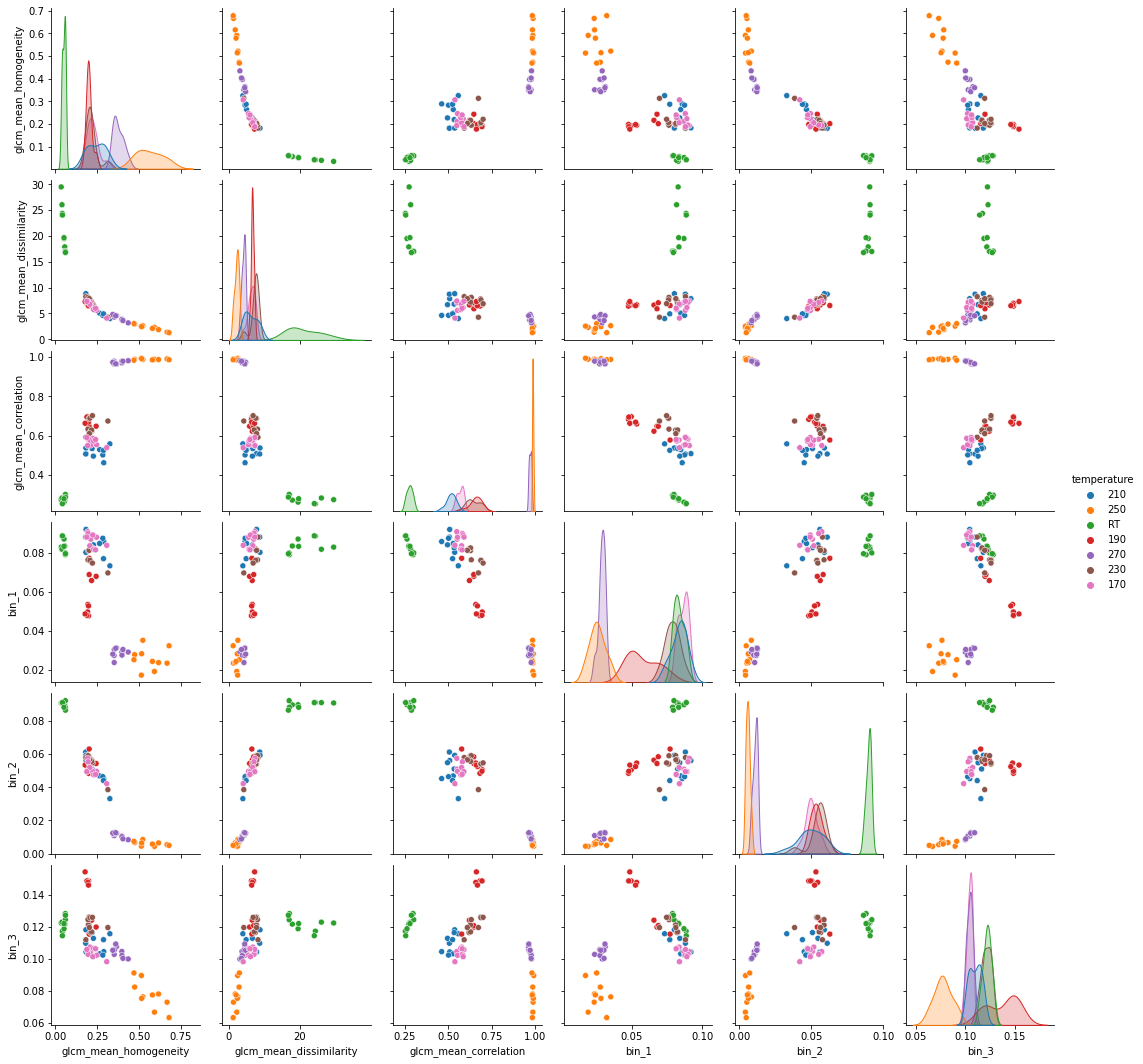

In [7]:
import seaborn as sns
sns.pairplot(df[[
#     'glcm_mean_contrast',
                 'glcm_mean_homogeneity',
#                  'glcm_mean_energy',
                 'temperature',
                 'glcm_mean_dissimilarity',
                 'glcm_mean_correlation','bin_1','bin_2','bin_3']
#                  'bin_4','bin_5','bin_6','bin_7','bin_8','bin_9']
                    ], hue="temperature" )


# GLCM Correlation

The **GLCM (Gray-Level Co-occurrence Matrix) Correlation** is a texture feature that quantifies the statistical correlation between pixel intensities in a defined spatial relationship (distance and angle) within an image. It measures how linearly related the gray levels of neighboring pixels are.

---

## **Formula**

The GLCM correlation is defined as:

$$
\text{Correlation} = \frac{\sum_{i,j} (i - \mu_i)(j - \mu_j) P(i,j)}{\sigma_i \sigma_j}
$$

Where:
- \(P(i, j)\): Normalized GLCM value at row \(i\) and column \(j\), representing the probability of a pixel pair with intensities \(i\) and \(j\).
- \(\mu_i, \mu_j\): Mean of the row and column indices (gray levels), computed as:
  $$
  \mu_i = \sum_{i,j} i \cdot P(i, j) \quad \text{and} \quad \mu_j = \sum_{i,j} j \cdot P(i, j)
  $$
- \(\sigma_i, \sigma_j\): Standard deviation of the row and column indices, computed as:
  $$
  \sigma_i = \sqrt{\sum_{i,j} (i - \mu_i)^2 P(i, j)} \quad \text{and} \quad \sigma_j = \sqrt{\sum_{i,j} (j - \mu_j)^2 P(i, j)}
  $$

---

## **Interpretation**

- **High Correlation (close to 1):**
  - Indicates that the pixel intensities in the specified spatial relationship are linearly related.
  - The texture is more uniform and regular in the measured direction and distance.
  - **Example:** A smooth gradient or repetitive pattern.

- **Low Correlation (close to 0):**
  - Indicates little or no linear relationship between pixel intensities.
  - The texture is more complex, irregular, or random in the measured direction and distance.
  - **Example:** Highly textured or noisy regions.

- **Negative Correlation (possible in certain cases):**
  - Suggests an inverse relationship between pixel intensities in the specified spatial relationship.
  - **Example:** Checkerboard-like patterns.

---

## **Applications in Texture Analysis**

- **Surface Uniformity:**
  - High correlation values suggest that the surface has consistent or repetitive patterns.
  - Low values indicate irregularities or abrupt changes in texture.

- **Material Characterization:**
  - Used in AFM or other imaging techniques to distinguish between uniform substrates and areas with irregular structures (e.g., terraces, defects).

- **Classification:**
  - Correlation can be used as a feature in machine learning to classify different texture types.

By analyzing GLCM correlation alongside other features (like contrast, homogeneity, energy), deeper insights can be gained into the textural properties of an image.


In [8]:
df[df['temperature'].isin(['230','170','190','210'])]

,glcm_dist_1_angle_0.0_contrast,glcm_dist_1_angle_0.0_homogeneity,glcm_dist_1_angle_0.0_energy,glcm_dist_1_angle_0.0_dissimilarity,glcm_dist_1_angle_0.0_correlation,glcm_dist_1_angle_45.0_contrast,glcm_dist_1_angle_45.0_homogeneity,glcm_dist_1_angle_45.0_energy,glcm_dist_1_angle_45.0_dissimilarity,glcm_dist_1_angle_45.0_correlation,...,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,temperature,file_name
0,48.754274,0.296407,0.056889,4.229825,0.856235,94.062730,0.204715,0.046931,6.107236,0.722723,...,0.056107,0.104294,0.137238,0.136368,0.087402,0.084717,0.088654,0.157242,210,241118_Z Height_Forward_007.txt
1,19.375475,0.426362,0.108888,2.500536,0.853542,40.944437,0.317491,0.090839,3.682922,0.691000,...,0.045212,0.104462,0.121109,0.137436,0.090561,0.093979,0.107971,0.169586,210,241118_Z Height_Forward_013.txt
2,70.248070,0.286144,0.058460,4.761060,0.852032,127.444675,0.204182,0.048788,6.717601,0.731700,...,0.061203,0.109711,0.138306,0.133728,0.086884,0.084290,0.089066,0.152588,210,241118_Z Height_Forward_010.txt
3,13.519485,0.473266,0.110945,2.118352,0.875113,25.031772,0.373001,0.093213,2.988897,0.768641,...,0.033112,0.115616,0.135986,0.160217,0.094971,0.088242,0.115631,0.151581,210,241118_Z Height_Forward_004.txt
4,20.653814,0.400621,0.088541,2.717601,0.862043,39.619469,0.299936,0.074186,3.855440,0.735825,...,0.046814,0.103104,0.132996,0.142532,0.092209,0.087860,0.103958,0.160919,210,241118_Z Height_Forward_005.txt
5,19.681740,0.421939,0.101485,2.508241,0.855235,37.370842,0.312712,0.084381,3.619393,0.725091,...,0.046356,0.102310,0.123230,0.134232,0.091095,0.093445,0.108765,0.167557,210,241118_Z Height_Forward_011.txt
6,63.911198,0.293371,0.052163,4.670481,0.865291,117.277816,0.211340,0.043308,6.542745,0.753248,...,0.059204,0.118073,0.153946,0.148819,0.089722,0.077393,0.081039,0.142960,210,241118_Z Height_Forward_001.txt
7,42.666115,0.349116,0.077871,3.643964,0.852657,80.262514,0.254616,0.064733,5.154018,0.721953,...,0.054764,0.112762,0.135178,0.138672,0.093750,0.084595,0.090805,0.157715,210,241118_Z Height_Forward_014.txt
8,37.177619,0.353537,0.066282,3.560156,0.866755,70.161569,0.251560,0.054117,5.096009,0.749001,...,0.050980,0.116333,0.146011,0.148148,0.089966,0.082138,0.089859,0.150436,210,241118_Z Height_Forward_002.txt
9,21.592862,0.424569,0.093417,2.628002,0.860579,38.974887,0.330352,0.078738,3.660992,0.748647,...,0.043991,0.111908,0.135712,0.151093,0.095215,0.085114,0.103271,0.157333,210,241118_Z Height_Forward_003.txt


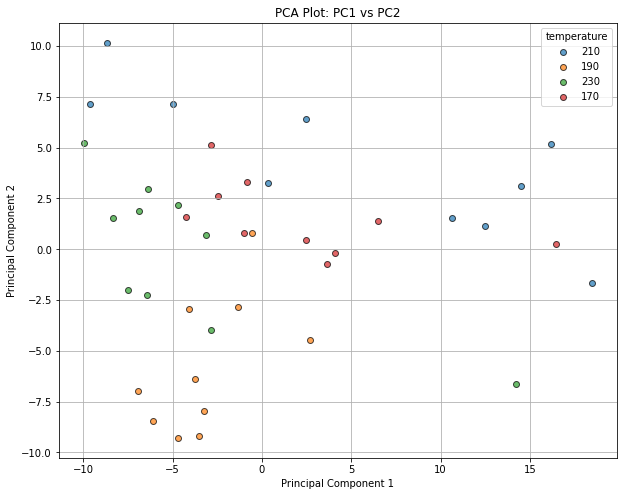

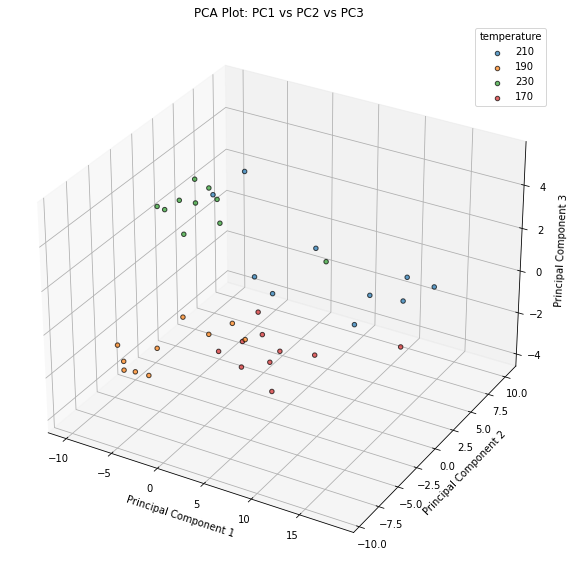

In [5]:
from AFM_ANALYSIS.analysis.pca_analysis import perform_pca_and_plot
import pandas as pd
import numpy as np

# Define the columns to use for PCA
features = [
    'glcm_mean_contrast', 
    'glcm_mean_homogeneity', 
    'glcm_mean_energy', 
    'glcm_mean_dissimilarity', 
    'glcm_mean_correlation'
]
# Define the columns to use for PCA
features = [col for col in df.columns if col not in ['file_name','temperature']]
# Define themperatures to analyse
temperatures=['230','170','190','210']
# Perform PCA and plot
pca_results = perform_pca_and_plot(df[df['temperature'].isin(temperatures)], features, temp_col='temperature', n_components=3)
# pca_results = perform_pca_and_plot(df[df['temperature'].isin(df['temperature'])], features, temp_col='temperature', n_components=3)


This means that there is a significant difference between the terrace phases and the ribons phase, even with this resolution.

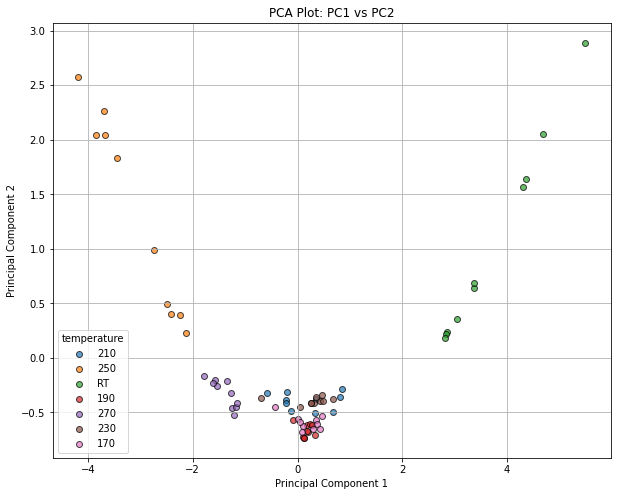

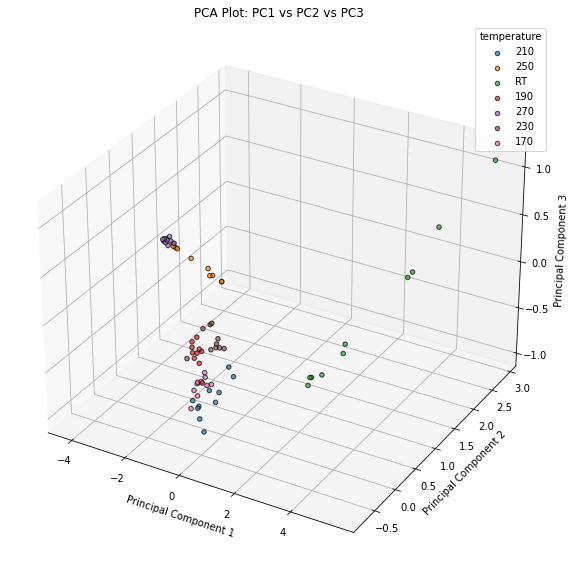

In [6]:
# Define the columns to use for PCA
features = [
    'glcm_mean_contrast', 
    'glcm_mean_homogeneity', 
    'glcm_mean_energy', 
    'glcm_mean_dissimilarity', 
    'glcm_mean_correlation'
]

# Perform PCA and plot
pca_results = perform_pca_and_plot(df, features, temp_col='temperature', n_components=3)


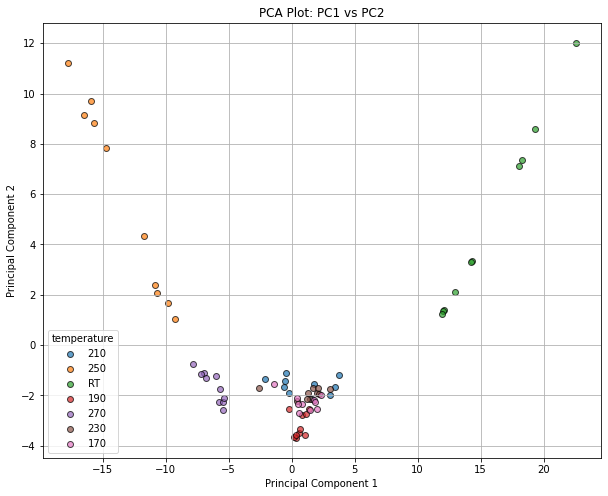

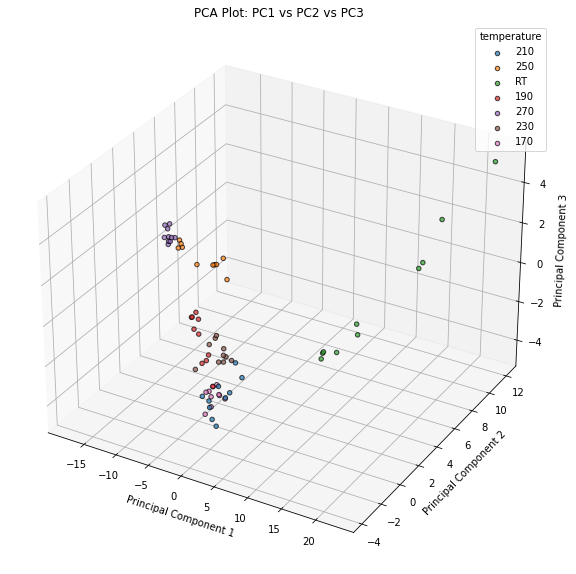

In [7]:
# Define the columns to use for PCA
features = [col for col in df.columns if col not in ['file_name','temperature']]

# Perform PCA and plot
pca_results = perform_pca_and_plot(df, features, temp_col='temperature', n_components=3)


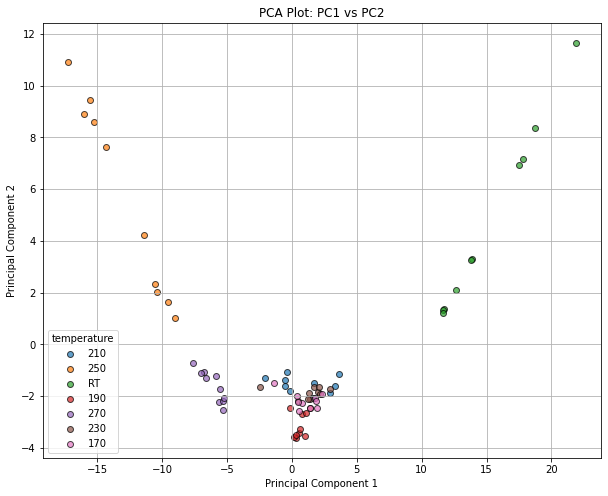

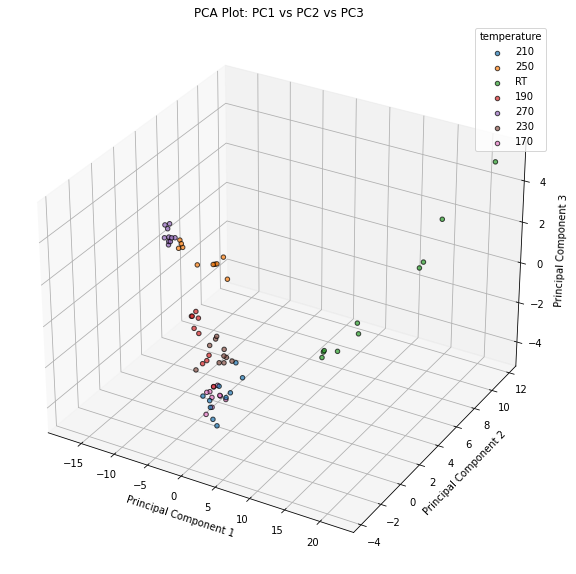

In [8]:
# Define the columns to use for PCA
features = [col for col in df.columns if col not in 
['file_name','temperature',
    'glcm_mean_contrast', 
    'glcm_mean_homogeneity', 
    'glcm_mean_energy', 
    'glcm_mean_dissimilarity', 
    'glcm_mean_correlation'
]]

# Perform PCA and plot
pca_results = perform_pca_and_plot(df, features, temp_col='temperature', n_components=3)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.color import label2rgb

def analyze_connected_components(image, threshold, plot=False):
    """
    Analyzes connected components in a binary image and plots the results.
    
    Parameters:
        image (ndarray): 2D grayscale image.
        threshold (float): Threshold value for binarization.
        plot (bool): If True, plots the labeled components.

    Returns:
        dict: A dictionary containing component density and count.
    """
    # Clip negative values for processing
    image = np.clip(image, 0, None)

    # Binarize the image
    binary_image = image > threshold

    # Label connected components
    labeled_image = label(binary_image)

    # Compute connected component properties
    num_components = labeled_image.max()
    density = num_components / image.size

    # Plot components
    if plot:
        rgb_image = label2rgb(labeled_image, image=image, bg_label=0, alpha=0.3)
        plt.figure(figsize=(10, 6))
        plt.imshow(rgb_image, cmap='nipy_spectral')
        plt.title(f"Connected Components (Count: {num_components}, Density: {density:.4f})")
        plt.axis('off')
        plt.show()

    return {"num_components": num_components, "density": density}


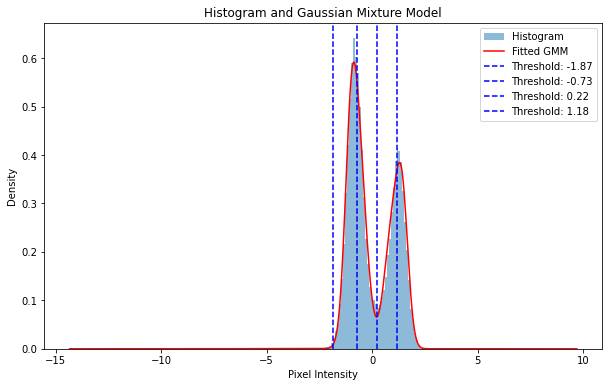

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


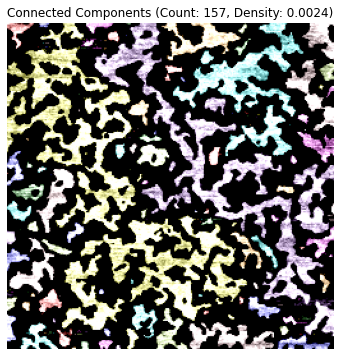

{'num_components': 157, 'density': 0.0023956298828125}

In [10]:
from AFM_ANALYSIS.analysis.thresholding import determine_threshold_with_gmm

optimal_threshold = determine_threshold_with_gmm(z_matrix)
results = analyze_connected_components(z_matrix, threshold=0, plot=True)
results


In [8]:
optimal_threshold

-1.8657556515064861

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


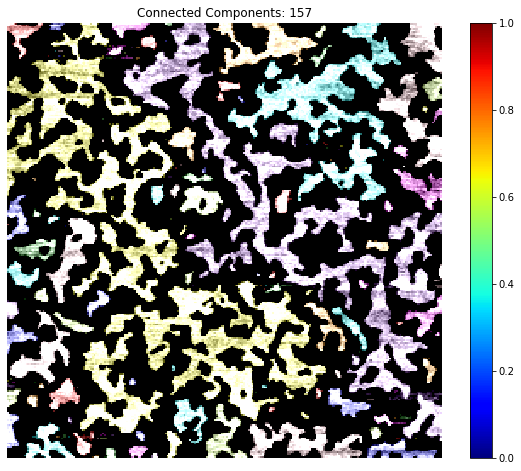

Number of connected components: 157
Component density: 0.0023956298828125


In [15]:
from AFM_ANALYSIS.analysis.thresholding import determine_threshold_with_gmm

from AFM_ANALYSIS.analysis.connected_components_analysis import analyze_connected_components

# Load AFM data from a TXT file
afm_data = extractor.load_afm_txt(file_path)

# Analyze connected components
results = analyze_connected_components(afm_data, threshold=0, plot=True)

print(f"Number of connected components: {results['component_count']}")
print(f"Component density: {results['component_density']}")


In [17]:
import matplotlib.pyplot as plt

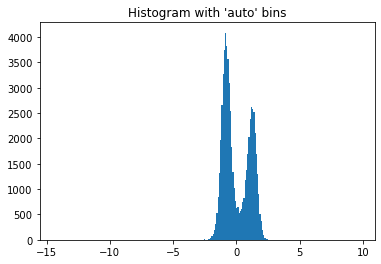

In [22]:
import matplotlib.pyplot as plt
import numpy as np


plt.hist(z_matrix.flatten(), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

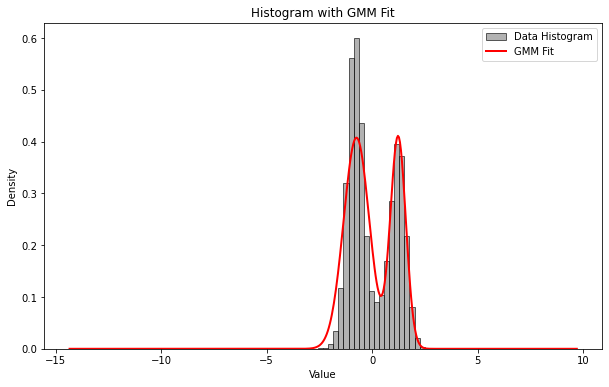

In [29]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Example matrix (replace this with your data)
# matrix = np.random.rand(100, 100)  # 100x100 matrix
matrix = z_matrix
# Flatten the matrix
flattened_data = matrix.flatten().reshape(-1, 1)

# Apply GMM
num_components = 2  # Adjust the number of components as needed
# gmm = GaussianMixture(n_components=num_components, random_state=42)
gmm = GaussianMixture(n_components=num_components, random_state=42)

gmm.fit(flattened_data)

# Generate the GMM PDF
x = np.linspace(flattened_data.min(), flattened_data.max(), 500).reshape(-1, 1)
pdf = np.exp(gmm.score_samples(x))

# Plot the histogram and GMM fit
plt.figure(figsize=(10, 6))

# Histogram of data
plt.hist(flattened_data, bins=100, density=True, alpha=0.6, color='gray', edgecolor='black', label='Data Histogram')

# GMM PDF
plt.plot(x, pdf, color='red', lw=2, label='GMM Fit')

# Labels and legend
plt.title('Histogram with GMM Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.show()


In [28]:
gmm.means_

array([[-0.74181154],
       [ 1.23226406]])

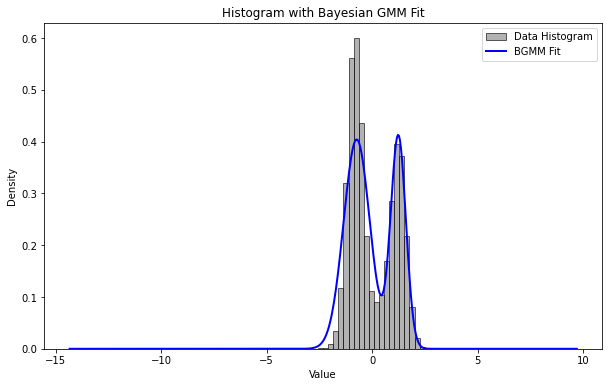

In [34]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt

# Example matrix (replace this with your data)
matrix = np.random.rand(100, 100)  # 100x100 matrix
matrix = z_matrix

# Flatten the matrix
flattened_data = matrix.flatten().reshape(-1, 1)

# Apply Bayesian Gaussian Mixture Model
num_components = 2  # Maximum possible number of components
bgmm = BayesianGaussianMixture(n_components=num_components, random_state=42, covariance_type='full')
bgmm.fit(flattened_data)

# Generate the BGMM PDF
x = np.linspace(flattened_data.min(), flattened_data.max(), 500).reshape(-1, 1)
pdf = np.exp(bgmm.score_samples(x))

# Plot the histogram and BGMM fit
plt.figure(figsize=(10, 6))

# Histogram of data
plt.hist(flattened_data, bins=100, density=True, alpha=0.6, color='gray', edgecolor='black', label='Data Histogram')

# BGMM PDF
plt.plot(x, pdf, color='blue', lw=2, label='BGMM Fit')

# Labels and legend
plt.title('Histogram with Bayesian GMM Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.show()


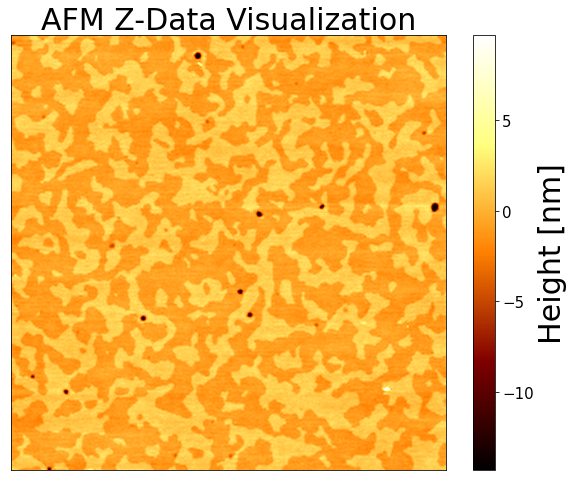

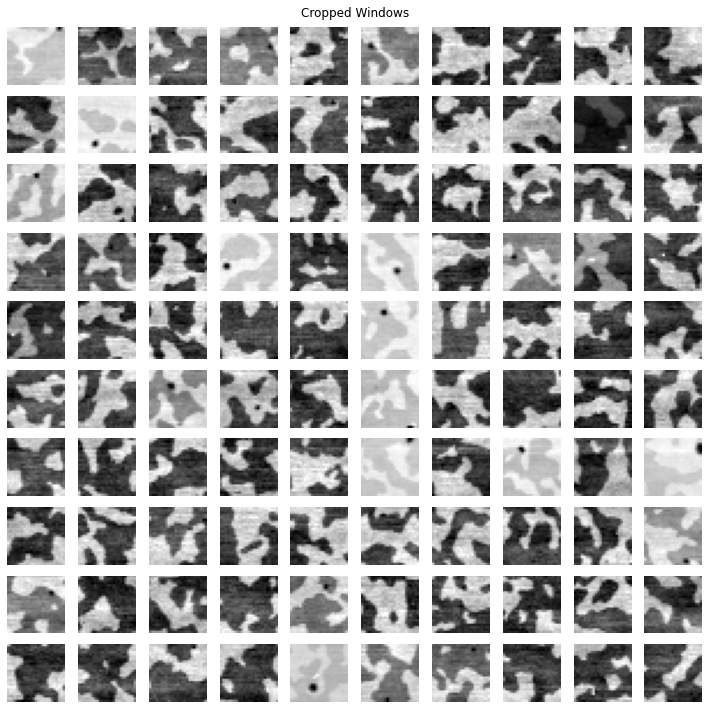

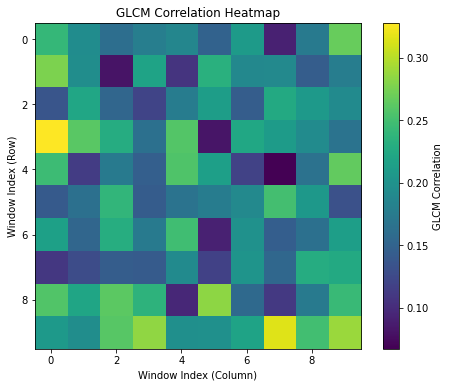

In [1]:
from AFM_ANALYSIS.analysis.crop_glcm import crop_and_analyze_glcm
import pandas as pd
import numpy as np

from AFM_ANALYSIS import texture_features

# Instantiate the TextureFeatureExtractor
extractor = texture_features.TextureFeatureExtractor()
# Path to AFM TXT file
file_path = '../data/170/241125_Z Height_Forward_014.txt'

# Load AFM data and resize to 256x256
z_matrix = extractor.load_afm_txt(file_path, output_size=(256, 256))

# Visualize the resized Z-data
extractor.visualize_z_data(z_matrix, figsize=(10, 8))

# GLCM features
n = 10**2  # Total number of windows (must be a perfect square)
distances = [1, 2]  # Example distances
angles = [0, np.pi/4]  # Example angles
prop = 'correlation'  # Example GLCM property

# Call the function
crop_and_analyze_glcm(z_matrix, n, distances, angles, prop)